# Analyze your own annotations!

Change the `myUsername` variable below to your Hypothes.is username, and run all the cells below. You may need to install the `wordcloud` library using Anaconda. Usually you can do that by opening a terminal and typing `conda install wordcloud`. 

In [56]:
import requests
import json
import pandas as pd
from time import sleep
import wordcloud
import matplotlib.pyplot as plt
import nltk
import collections
plt.rcParams['figure.figsize'] = [14,6]

In [2]:
myUsername = "JonathanReeve"

In [3]:
textUrl = 'https://icla2021.jonreeve.com/texts/moonstone.html'
def getUsers(offset=0): 
    """ Gets a list of users who have annotated *The Moonstone*."""
    params = {'url': textUrl,
              'limit': 200,
              'offset': offset}
    response = requests.get('https://hypothes.is/api/search', params=params)
    if response.ok: 
        parsed = json.loads(response.text)
        users = list(set([row['user'] for row in parsed['rows']]))
        return users
    else: 
        print('Response not OK!')
        return response

In [4]:
def getUserAnnotations(user, offset=0):
    """ Get all annotations, including metadata, for a user. """
    params = { 'url': textUrl,
               'user': user,
              'limit': 100,
              'offset': offset}
    response = requests.get('https://hypothes.is/api/search', params=params)
    if response.ok: 
        parsed = json.loads(response.text)
        return parsed
    else: 
        print('Response not OK!')
        return response

In [5]:
users = getUsers()

In [6]:
def plotTimes(label, rows):
    times = [pd.to_datetime(row['created']) for row in rows]
    df = pd.DataFrame([1 for i in range(len(times))], index=times, columns=[label])
    df = df.resample('D').sum()
    df.plot(kind='bar')
    return df

In [7]:
def plotUser(username): 
    page = getUserAnnotations(username)
    rows = page['rows']
    df = plotTimes(username, rows)
    return df

In [8]:
def formatUsername(username): 
    return "acct:{}@hypothes.is".format(username)

In [9]:
def getAnnotations(username):
    formattedUsername = formatUsername(username)
    page = getUserAnnotations(formattedUsername)
    rows = page['rows']
    texts = [row['text'] for row in rows]
    return texts

In [10]:
def makeWordCloud(username):
    myAnnotations = getAnnotations(username)
    myAnnotationsJoined = '\n'.join(myAnnotations)
    myWordcloud = wordcloud.WordCloud().generate(myAnnotationsJoined)
    plt.imshow(myWordcloud, interpolation='bilinear')
    plt.axis("off")

# What kinds of things do I say in my annotations? 

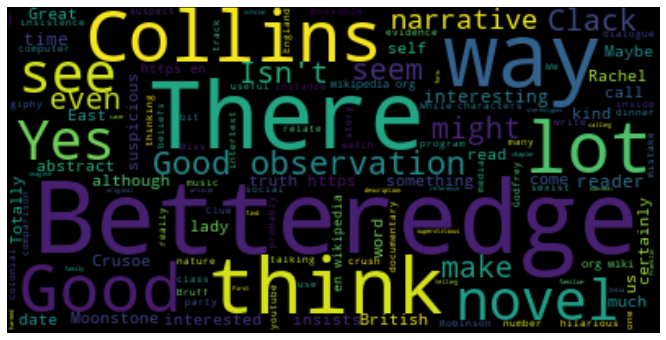

In [11]:
makeWordCloud(myUsername)

# How often did I annotate on each day? 

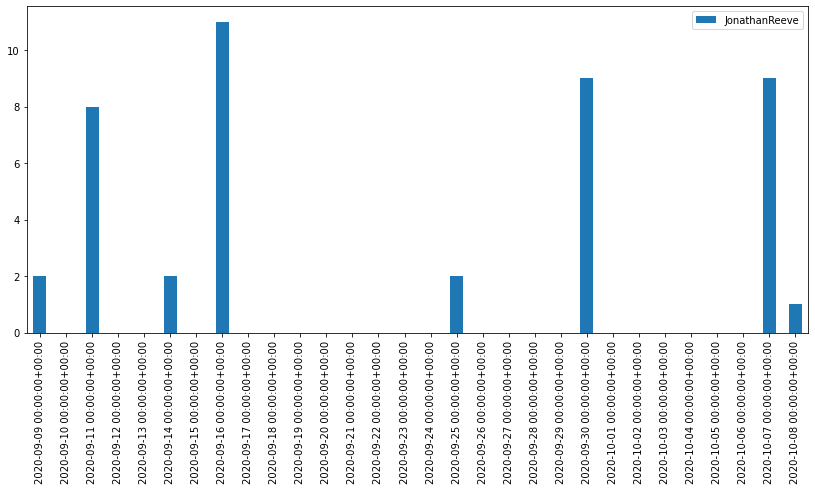

In [12]:
df = plotUser(myUsername)

# What kinds of words did I tend to highlight in my annotations? 

In [48]:
def getHighlighted(username): 
    myAnnotations = getUserAnnotations('JonathanReeve')
    myTargets = [annotation['target'] for annotation in myAnnotations['rows']]
    highlights = []
    for target in myTargets: 
        for innerTarget in target: 
            if 'selector' in innerTarget: 
                selector = innerTarget['selector']
                for innerSelector in selector:
                    if 'type' in innerSelector:
                        # This is starting to get really annoying
                        if innerSelector['type'] == 'TextQuoteSelector':
                            highlightedText = innerSelector['exact']
                            highlights.append(highlightedText)
    myWordcloud = wordcloud.WordCloud().generate(' '.join(highlights))
    plt.imshow(myWordcloud, interpolation='bilinear')
    plt.axis("off")

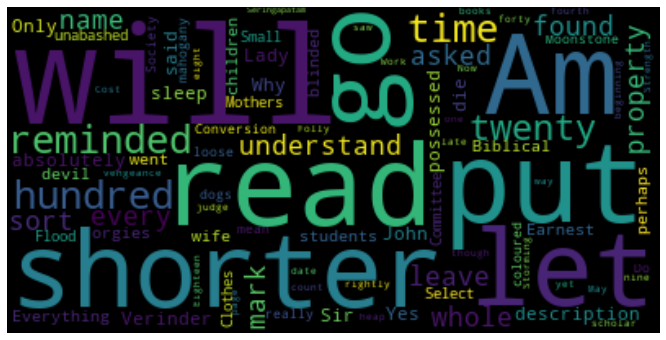

In [76]:
getHighlighted(myUsername)

# What characters do I like to talk about the most? 

In [83]:
myAnnotations = getAnnotations(myUsername)

In [84]:
myTokens = nltk.word_tokenize(' '.join(myAnnotations).lower())

In [85]:
charCounts = {character: collections.Counter(myTokens)[character] 
              for character in ['clack', 'betteredge', 'godfrey', 'blake', 'franklin', 'rachel', 'bruff']}

<AxesSubplot:>

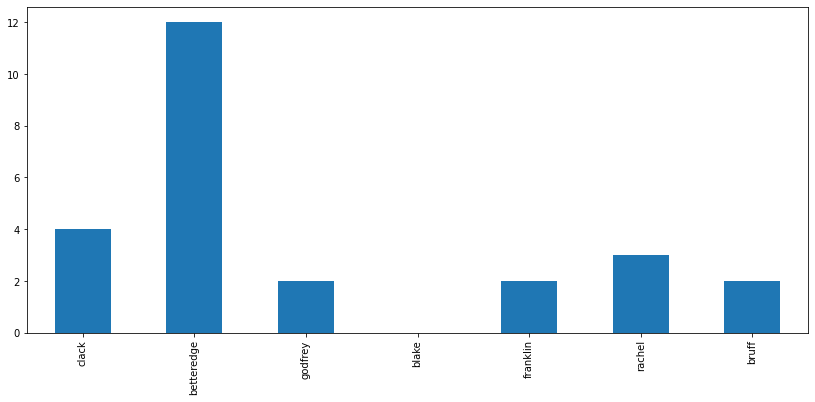

In [86]:
pd.Series(charCounts).plot(kind='bar')